In [1]:
import torch

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from dataset import get_rays
from model import Nerf
from ml_helpers import training

# Camera / Dataset

In [2]:
batch_size = 1024
height = 400
width = 400
imgs = 100

o, d, target_px_values = get_rays('datasets/monkey_3', mode='train')
dataloader = DataLoader(torch.cat((torch.from_numpy(o).reshape(-1, 3).type(torch.float),
                                   torch.from_numpy(d).reshape(-1, 3).type(torch.float),
                                   torch.from_numpy(target_px_values).reshape(-1, 3).type(torch.float)), dim=1),
                       batch_size=batch_size, shuffle=True)


dataloader_warmup = DataLoader(torch.cat((torch.from_numpy(o).reshape(imgs, 400, 400, 3)[:, 100:300, 100:300, :].reshape(-1, 3).type(torch.float),
                               torch.from_numpy(d).reshape(imgs, 400, 400, 3)[:, 100:300, 100:300, :].reshape(-1, 3).type(torch.float),
                               torch.from_numpy(target_px_values).reshape(imgs, 400, 400, 3)[:, 100:300, 100:300, :].reshape(-1, 3).type(torch.float)), dim=1),
                       batch_size=batch_size, shuffle=True)


# test_o, test_d, test_target_px_values = get_rays('datasets/monkey_3', mode='test')

# Training - Change model name

In [3]:
pth_file = 'nerf_models/monkey_biz.pth'

100%|██████████| 3907/3907 [01:44<00:00, 37.53it/s]


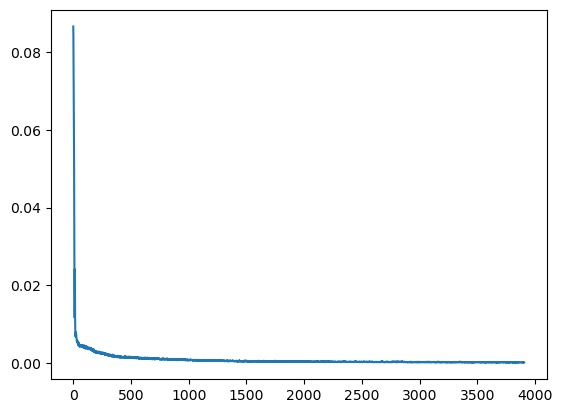

100%|██████████| 15625/15625 [06:43<00:00, 38.70it/s]


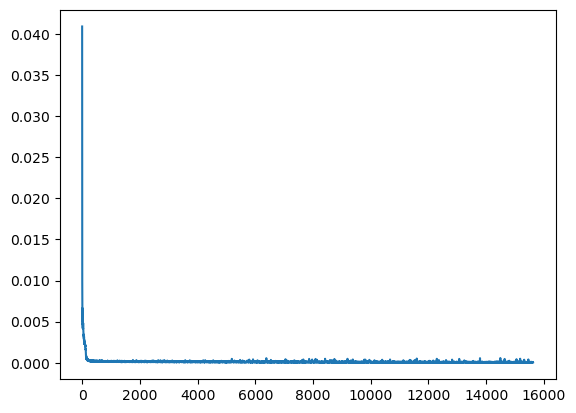

In [4]:
device = 'cuda'

tn = 8.
tf = 12.
nb_epochs = 1
lr = 1e-3
gamma = .5
nb_bins = 100

model = Nerf(hidden_dim=128).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10], gamma=gamma)


training_loss = training(model, optimizer, scheduler, tn, tf, nb_bins, 1, dataloader_warmup, model_name=pth_file, device=device)
plt.plot(training_loss)
plt.show()
training_loss = training(model, optimizer, scheduler, tn, tf, nb_bins, nb_epochs, dataloader, model_name=pth_file, device=device)
plt.plot(training_loss)
plt.show()